In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset =pd.read_csv(r"C:\Users\sachi\Desktop\Simple-Regression-using-LR-and-DT-main\Salary_Data.csv")

In [4]:
dataset.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


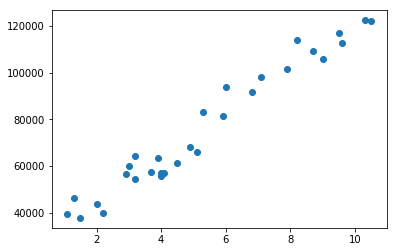

In [5]:
plt.scatter(dataset['YearsExperience'],dataset['Salary'])

In [9]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [12]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=101)

In [17]:
x_train.size

20

In [19]:
x_test.size

10

In [20]:
y_train

array([ 63218.,  43525.,  46205.,  93940., 101302.,  56957.,  56642.,
        61111.,  39343.,  98273.,  39891.,  64445.,  57081.,  57189.,
        67938., 121872., 113812.,  60150.,  83088.,  55794.])

In [21]:
y_test

array([ 91738., 109431.,  54445.,  81363.,  37731., 112635., 116969.,
        66029., 105582., 122391.])

Linear regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
LR=LinearRegression()

In [25]:
LR.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
y_pred_lr=LR.predict(x_test)

In [27]:
y_pred_lr

array([ 91477.92796603, 109893.22802466,  56585.7804865 ,  82754.89109615,
        40108.93306562, 118616.26489454, 117647.03857567,  75001.08054514,
       112800.90698129, 125400.84912667])

In [28]:
y_test

array([ 91738., 109431.,  54445.,  81363.,  37731., 112635., 116969.,
        66029., 105582., 122391.])

In [29]:
diff=y_test-y_pred_lr

In [33]:
res_df=pd.concat([pd.Series(y_pred_lr),pd.Series(y_test),pd.Series(diff)],axis=1)


In [34]:
res_df

,0,1,2
0,91477.927966,91738.0,260.072034
1,109893.228025,109431.0,-462.228025
2,56585.780487,54445.0,-2140.780487
3,82754.891096,81363.0,-1391.891096
4,40108.933066,37731.0,-2377.933066
5,118616.264895,112635.0,-5981.264895
6,117647.038576,116969.0,-678.038576
7,75001.080545,66029.0,-8972.080545
8,112800.906981,105582.0,-7218.906981
9,125400.849127,122391.0,-3009.849127


Text(0, 0.5, 'Salary')

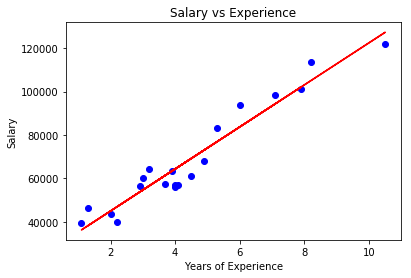

In [36]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,LR.predict(x_train),color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")


Text(0, 0.5, 'Salary')

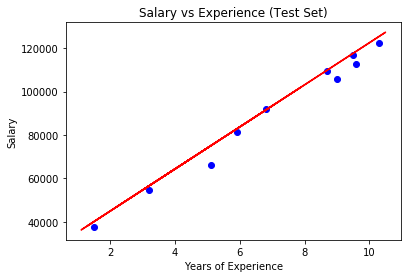

In [39]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_train,LR.predict(x_train),color='red')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")

METRICS

In [42]:
from sklearn import metrics
rmse= np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr))
R2=metrics.r2_score(y_test,y_pred_lr)

In [41]:
rmse

4363.043260343273

In [43]:
R2

0.974811112371526

In [47]:
LR.predict([[5.9]])

array([82754.89109615])